Look at the number of kiosks by borough and other important information.
Brief note on wi-fi geographic density (you can show this on a map) or gaps (for stakeholder context as markdown).


In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('/Users/ayemaq/Desktop/Mod5-Project-LinkNYC-Engagement-Analysis/data/raw/LinkNYC_Kiosk_Locations_20251008.csv')

In [3]:
df.head()

,Site ID,Planned Kiosk Type,Installation Status,PPT ID,Legacy ID,Borough,Council District,Community Board,Street Address,Cross Street 1,...,Zoning,Latitude,Longitude,Installation Complete,Activation Complete,Neighborhood Tabulation Area (NTA),Building Identification Number (BIN),Borough-Block-Lot (BBL),Census Tract (CT),Location
0,qu-01-125088,Link1.0,Live,125088,qu-01-125088,Queens,22,401,34-02 BROADWAY,34 STREET,...,C4-2A,40.760713,-73.922879,04/22/2017,06/08/2017,Astoria,4008830.0,4.006220e+09,4005900.0,"(40.760713, -73.922879)"
1,bk-01-160081,Link5G_Ad,Live,NaN,NaN,Brooklyn,34,301,161 VARICK AVENUE,SCHOLES STREET,...,M3-1,40.711080,-73.928620,10/09/2024,03/14/2025,NaN,NaN,3.029620e+09,44900.0,"(40.71108, -73.92862)"
2,qu-13-160016,Link5G_Ad,Live,NaN,NaN,Queens,23,413,264-21 UNION TURNPIKE,265th ST,...,R2A / C1-2,40.749170,-73.708140,02/29/2024,04/02/2025,Glen Oaks-Floral Park-New Hyde Park,4174076.0,4.085400e+09,NaN,"(40.74917, -73.70814)"
3,mn-04-122598,Link1.0,Live,122598,mn-04-122598,Manhattan,3,104,815 8 AVENUE,WEST 49 STREET,...,C6-4,40.761816,-73.986606,03/18/2016,04/27/2016,Clinton,1076203.0,1.010400e+09,1012700.0,"(40.761816, -73.986606)"
4,mn-05-137210,Link1.0,Live,137210,mn-05-137210,Manhattan,4,105,410 MADISON AVENUE,EAST 48 STREET,...,C5-3,40.756742,-73.976530,04/30/2017,05/26/2017,Midtown-Midtown South,1035437.0,1.012840e+09,1009400.0,"(40.756742, -73.97653)"


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2250 entries, 0 to 2249
Data columns (total 23 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Site ID                               2250 non-null   object 
 1   Planned Kiosk Type                    2250 non-null   object 
 2   Installation Status                   2250 non-null   object 
 3   PPT ID                                2102 non-null   object 
 4   Legacy ID                             2055 non-null   object 
 5   Borough                               2250 non-null   object 
 6   Council District                      2250 non-null   int64  
 7   Community Board                       2250 non-null   int64  
 8   Street Address                        2250 non-null   object 
 9   Cross Street 1                        2246 non-null   object 
 10  Cross Street 2                        2246 non-null   object 
 11  IxN Corner       

# Clean data first

In [5]:
# rename columns to remove spaces and make consistent
column_names = [
    'site_id', 'planned_kiosk_type', 'installation_status', 'ppt_id', 'legacy_id',
    'borough', 'council_district', 'community_board', 'street_address',
    'cross_street_1', 'cross_street_2', 'ixn_corner', 'postcode', 'zoning',
    'latitude', 'longitude', 'installation_complete', 'activation_complete',
    'nta', 'bin', 'bbl', 'census_tract', 'location'
]

df.columns = column_names


In [6]:
df.keys()

Index(['site_id', 'planned_kiosk_type', 'installation_status', 'ppt_id',
       'legacy_id', 'borough', 'council_district', 'community_board',
       'street_address', 'cross_street_1', 'cross_street_2', 'ixn_corner',
       'postcode', 'zoning', 'latitude', 'longitude', 'installation_complete',
       'activation_complete', 'nta', 'bin', 'bbl', 'census_tract', 'location'],
      dtype='object')

In [7]:
# convert datetimes
df['installation_complete'] = pd.to_datetime(df['installation_complete'])
df['activation_complete'] = pd.to_datetime(df['activation_complete'])

In [8]:
# check for missing values
df.isnull().sum()

site_id                    0
planned_kiosk_type         0
installation_status        0
ppt_id                   148
legacy_id                195
borough                    0
council_district           0
community_board            0
street_address             0
cross_street_1             4
cross_street_2             4
ixn_corner                51
postcode                   0
zoning                     4
latitude                   0
longitude                  0
installation_complete      0
activation_complete        0
nta                       10
bin                       73
bbl                       14
census_tract             161
location                   0
dtype: int64

### Column meanings (for ones I'm unaware of)
- **PPT ID**: Public Pay Telephone ID; it’s a unique identifier from when LinkNYC kiosks replaced old NYC payphones
    - Many LinkNYC kiosks were installed on the same physical sites where public pay telephones used to be, so this ID ties back to the city’s payphone inventory.
    - This is mostly historical - I don’t need it for analysis unless I;m comparing “old vs new” installations. For now skip it 

- **IxN Corner**:  “Intersection Name Corner.”
    - This usually describes the exact corner or cross-street placement of the kiosk — like “NW Corner” (northwest corner of an intersection).
    - 

- **Legacy ID** : The kiosk’s original internal tracking ID from an earlier version of the dataset.
    - It often duplicates what’s in Site ID but may differ for older records (before the dataset schema was standardized).

In [9]:
# count rows
df.shape

(2250, 23)

In [10]:
df.isnull().sum().sum()


np.int64(664)

In [11]:
# percent missing values
total_cells = df.size
total_missing = df.isnull().sum().sum() / total_cells * 100
total_missing

# The overall percentage of missing data is well below the 5% threshold
# The missing values are randomly distributed and do not affect key analytical variables


np.float64(1.2830917874396137)

### Missing Data Summary & Decision

The dataset contains **2,250 total records** and **664 missing values** across various columns. After inspecting the missingness by column, most null values appear in **administrative or non-essential fields** such as:

- `ppt_id` -> Historical payphone ID (no longer relevant for current LinkNYC kiosks)
- `legacy_id` -> Internal tracking code from older dataset versions
- `ixn_corner`, `cross_street_1`, `cross_street_2` -> Minor address descriptors, not critical for geographic or analytical accuracy
- `bin`, `bbl`, and `census_tract` ->  Technical geographic identifiers not needed for borough-level analysis

**Key columns required for analysis** : `borough`, `latitude`, `longitude`, `installation_complete`, `activation_complete`, and `planned_kiosk_type` are **fully complete**.  

**Decision:**  
- No imputation or row removal was necessary as missingness is minimal and not concentrated in key variables

- No rows or columns were dropped. The missing fields were retained as-is to preserve the dataset’s structure and ensure alignment with future NYC Open Data updates.  

- If deeper spatial granularity (e.g., census-tract level) becomes necessary later, missing geographic identifiers can be filled through spatial joins using latitude/longitude coordinates.


In [12]:
# check for duplicates
df.duplicated().sum()

np.int64(0)

In [13]:
# check for duplicate rows
df[df.duplicated()]


,site_id,planned_kiosk_type,installation_status,ppt_id,legacy_id,borough,council_district,community_board,street_address,cross_street_1,...,zoning,latitude,longitude,installation_complete,activation_complete,nta,bin,bbl,census_tract,location


In [14]:
df[df.duplicated(subset=['borough', 'street_address'], keep=False)]

,site_id,planned_kiosk_type,installation_status,ppt_id,legacy_id,borough,council_district,community_board,street_address,cross_street_1,...,zoning,latitude,longitude,installation_complete,activation_complete,nta,bin,bbl,census_tract,location
185,mn-08-120988,Link1.0,Live,120988,mn-08-120988,Manhattan,4,108,1175 3 AVENUE,EAST 68 STREET,...,C1-9,40.767234,-73.962290,2016-02-27,2016-03-30,Lenox Hill-Roosevelt Island,1043902.0,1.014238e+09,1011800.0,"(40.767234, -73.96229)"
216,mn-05-138006,Link1.0,Live,138006,mn-05-138006,Manhattan,3,105,750 6 AVENUE,WEST 25 STREET,...,C6-4X,40.743706,-73.992084,2017-09-24,2017-12-04,Hudson Yards-Chelsea-Flatiron-Union Square,1085951.0,1.008260e+09,1005800.0,"(40.743706, -73.992084)"
234,mn-05-133354,Link1.0,Live,133354,mn-05-133354,Manhattan,3,105,1515 BROADWAY,WEST 45 STREET,...,C6-7T,40.757666,-73.985878,2016-12-18,2018-03-05,Midtown-Midtown South,1024714.0,1.010160e+09,1011900.0,"(40.757666, -73.985878)"
329,bk-07-145901,Link1.0,Live,145901,LINK-021526,Brooklyn,38,307,875 4 AVENUE,32 STREET,...,C2-4,40.656384,-74.002053,2017-07-31,2017-09-05,Sunset Park West,3010094.0,3.006810e+09,3010100.0,"(40.656384, -74.002053)"
518,mn-06-121836,Link1.0,Live,121836,mn-06-121836,Manhattan,4,106,909 3 AVENUE,EAST 54 STREET,...,C6-6,40.758377,-73.968759,2016-02-28,2016-03-18,Turtle Bay-East Midtown,1038570.0,1.013280e+09,1010800.0,"(40.758377, -73.968759)"
629,mn-06-133477,Link1.0,Live,133477,mn-06-133477,Manhattan,4,106,845 3 AVENUE,EAST 52 STREET,...,C6-6,40.756911,-73.969816,2016-03-18,2016-03-28,Turtle Bay-East Midtown,1038464.0,1.013250e+09,1009800.0,"(40.756911, -73.969816)"
694,mn-06-133890,Link1.0,Live,133890,mn-06-133890,Manhattan,2,106,205 3 AVENUE,EAST 18 STREET,...,C1-9A,40.735839,-73.985171,2016-01-29,2016-02-28,Gramercy,1019580.0,1.008990e+09,1004800.0,"(40.735839, -73.985171)"
705,mn-05-135892,Link1.0,Live,135892,mn-05-135892,Manhattan,4,105,300 MADISON AVENUE,EAST 42 STREET,...,C5-3,40.752545,-73.979585,2017-04-30,2017-07-19,Murray Hill-Kips Bay,1085972.0,1.012760e+09,1008200.0,"(40.752545, -73.979585)"
913,mn-08-120983,Link1.0,Live,120983,mn-08-120983,Manhattan,4,108,1175 3 AVENUE,EAST 69 STREET,...,C1-9,40.767655,-73.961971,2016-02-27,2016-03-29,Lenox Hill-Roosevelt Island,1043902.0,1.014238e+09,1011800.0,"(40.767655, -73.961971)"
1013,mn-06-121377,Link1.0,Live,121377,mn-06-121377,Manhattan,4,106,133 EAST 40 STREET,LEXINGTON AVENUE,...,C5-3,40.750133,-73.976794,2017-04-15,2017-06-21,Murray Hill-Kips Bay,1036147.0,1.012950e+09,1008000.0,"(40.750133, -73.976794)"


In [15]:
df['site_id'].duplicated().sum()


np.int64(0)

In [16]:
dupes = df[df.duplicated(subset=['borough', 'street_address'], keep=False)]
dupes[['site_id', 'borough', 'street_address', 'latitude', 'longitude']]


,site_id,borough,street_address,latitude,longitude
185,mn-08-120988,Manhattan,1175 3 AVENUE,40.767234,-73.962290
216,mn-05-138006,Manhattan,750 6 AVENUE,40.743706,-73.992084
234,mn-05-133354,Manhattan,1515 BROADWAY,40.757666,-73.985878
329,bk-07-145901,Brooklyn,875 4 AVENUE,40.656384,-74.002053
518,mn-06-121836,Manhattan,909 3 AVENUE,40.758377,-73.968759
629,mn-06-133477,Manhattan,845 3 AVENUE,40.756911,-73.969816
694,mn-06-133890,Manhattan,205 3 AVENUE,40.735839,-73.985171
705,mn-05-135892,Manhattan,300 MADISON AVENUE,40.752545,-73.979585
913,mn-08-120983,Manhattan,1175 3 AVENUE,40.767655,-73.961971
1013,mn-06-121377,Manhattan,133 EAST 40 STREET,40.750133,-73.976794


### Duplicate Check Summary
- No full duplicate rows or duplicate `site_id`s found.  
- Some kiosks share the same `street_address` within boroughs (e.g., multiple kiosks along 3rd Avenue or Madison Avenue).  
- Their latitude/longitude values differ slightly, confirming these are unique physical kiosks.  
- This clustering pattern likely reflects high-traffic commercial corridors with strong advertising potential, especially in Manhattan.


# EDA

In [17]:
# Let's begin EDA
df['borough'].value_counts()

borough
Manhattan        1230
Queens            398
Brooklyn          356
Bronx             216
Staten Island      50
Name: count, dtype: int64

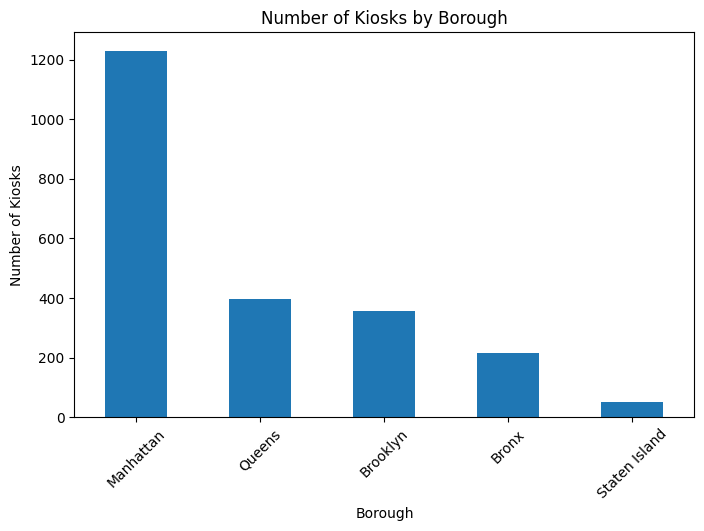

In [18]:
# creat a bar chart
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 5))
df['borough'].value_counts().plot(kind='bar')
plt.title('Number of Kiosks by Borough')
plt.xlabel('Borough')
plt.ylabel('Number of Kiosks')
plt.xticks(rotation=45)
plt.show()

Manhattan hosts the majority of kiosks - over 50%, which aligns with its high commercial density and advertising visibility potential. Staten Island has the fewest kiosks, reflecting limited ad reach in that borough (check usage)

In [19]:
borough_density = (df['borough'].value_counts(normalize=True) * 100).round(2)
borough_density


borough
Manhattan        54.67
Queens           17.69
Brooklyn         15.82
Bronx             9.60
Staten Island     2.22
Name: proportion, dtype: float64

In [20]:
import plotly.express as px

px.scatter_mapbox(
    df,
    lat='latitude',
    lon='longitude',
    color='borough',
    zoom=9,
    mapbox_style='carto-positron',
    title='LinkNYC Kiosk Distribution Across NYC'
)


/var/folders/v2/9k8drrwj5h39kpr935vvx6j80000gn/T/ipykernel_4040/3039204536.py:3: DeprecationWarning: *scatter_mapbox* is deprecated! Use *scatter_map* instead. Learn more at: https://plotly.com/python/mapbox-to-maplibre/
  px.scatter_mapbox(


### Wi-Fi Geographic Density & Gaps

The geographic distribution of LinkNYC kiosks shows **high density in Manhattan**, especially along commercial corridors like Midtown and Downtown, where foot traffic and ad visibility are strongest.  

In contrast, **outer boroughs** - particularly the **Bronx** and **Staten Island** - have noticeably fewer kiosks, highlighting **uneven Wi-Fi access** across the city.

For stakeholders, this pattern suggests that while LinkNYC effectively captures the city’s commercial core, there is **growth potential in underserved neighborhoods**.  

Future expansions, especially under the **Link5G rollout**, can help close these geographic gaps while opening new opportunities for community access and localized advertising.


### Geographic Distribution Insights

This map shows the geographic spread of LinkNYC kiosks across the five boroughs.  Each dot represents a kiosk, colored by borough.

- **Manhattan** has the highest kiosk concentration, especially in Midtown and Downtown - aligning with its dense foot traffic and advertising opportunities.
- **Queens** and **Brooklyn** have moderate coverage, mostly clustered along  corridors and commercial hubs.  
- **The Bronx** shows fewer kiosks, primarily near transit or shopping zones.  
- **Staten Island** has minimal representation, highlighting a gap in both digital access and advertising reach.  

These spatial patterns confirm that LinkNYC’s infrastructure  and by extension, ad visibility is heavily centered in Manhattan’s commercial zones, leaving outer boroughs with significant growth potential.

Context terms to know of: 
- **Commercial Hubs:** These are busy areas where people shop, work, eat, or travel basically places that attract a lot of foot traffic.
    - Examples in NYC: Times Square, Midtown Manhattan (6th Ave, 5th Ave), Downtown Brooklyn, Queens Center Mall area
- These areas are prime ad zones, more people walking by means more impressions for digital ads on LinkNYC kiosks!

- **Commercial Corridors:** a major street/avenue lined up with businesses, stores, offices, transit stops, basically like a main artery of activities throughout a neighborhood
    - Examples: 125th Street in Harlem, Flatbush Avenue in Brooklyn, Queens Boulevard in Queens, Fordham Road in the Bronx
- Kiosks placed along these corridors capture consistent, predictable exposure because commuters, pedestrians, and shoppers pass them daily.

In [21]:
df['zone_type'] = df['zoning'].str[0]
df['zone_type'].value_counts()

zone_type
C    2011
M     175
R      56
P       4
Name: count, dtype: int64

In [22]:
zone_type_density = (df['zone_type'].value_counts(normalize=True) * 100).round(2)
zone_type_density

zone_type
C    89.54
M     7.79
R     2.49
P     0.18
Name: proportion, dtype: float64

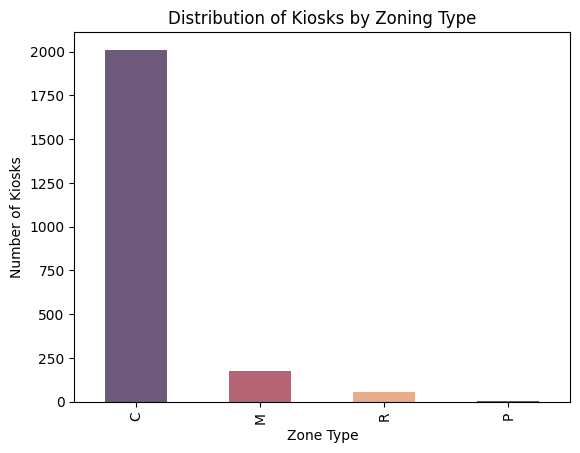

In [23]:
df['zone_type'].value_counts().plot(kind='bar', color=['#6d597a','#b56576','#eaac8b'])
plt.title('Distribution of Kiosks by Zoning Type')
plt.xlabel('Zone Type')
plt.ylabel('Number of Kiosks')
plt.show()


| Letter | Zone Type                 | Meaning / Where You’d See It                                                              | Why it matters for our stakeholders                                       |
| ------ | ------------------------- | ----------------------------------------------------------------------------------------- | ------------------------------------------------------------ |
| **C**  | **Commercial**            | Busy business areas — stores, offices, main streets like 5th Ave, Madison, Flatbush, etc. | **Most ads here!** High visibility and foot traffic.      |
| **R**  | **Residential**           | Neighborhoods, apartment zones, quieter areas                                             | Less ad reach, more about public access (Wi-Fi benefit). |
| **M**  | **Manufacturing**         | Industrial or warehouse zones (e.g., parts of Brooklyn or Queens)                         | Lower ad exposure, not ideal for partnerships.            |
| **P**  | **Parks / Public** (rare) | Parks or public use land (you might see a few)                                            | Special cases, usually limited ad usage.                  |


The majority of LinkNYC kiosks are located in commercial zones, which aligns with ad visibility and partnership goals — they’re placed right where people shop, commute, and work.

### Notes
- How It Relates to Stakeholders (City Advertising & Partnerships):
    - The zoning data gives insight into where ads are currently reaching people and where they aren’t.
- Here’s the business logic:
    - The City Advertising team can use this to understand which neighborhoods already have strong ad exposure (C zones) and which could be targeted for expansion.
    - It highlights an opportunity gap: areas under “R” zones (like the Bronx or Staten Island) might need more kiosks to ensure equitable access and expand the advertising footprint.
    - The Partnerships team can pitch localized sponsorships, e.g., “Community Wi-Fi + ad space expansion in underrepresented zones.”

### Zoning Insights for Stakeholders

The zoning breakdown reveals that **most LinkNYC kiosks are located in commercial (C) zones**, aligning with high-traffic business districts where advertising visibility is highest.  

This concentration supports the City Advertising and Partnerships team's current strategy to maximize ad impressions in dense, commercial areas.  

However, the smaller presence in **residential (R)** and **manufacturing (M)** zones indicates potential **growth opportunities**:
- Expanding kiosks in residential areas can increase equity and digital access.  
- Targeted installations in underrepresented areas could broaden the advertising network’s reach and community impact.

In summary, the zoning data confirms that LinkNYC’s network is optimized for commercial engagement while also highlighting untapped potential for community-focused expansion.


### How come P zones have such little to no kiosks?

Well they are uncommon because “P” zones are usually city-owned parkland or open public spaces (like Central Park, Prospect Park, Flushing Meadows, etc.)
- Any kind of commercial installation especially something that shows ads - has to go through strict approval processes by NYC Parks and the Public Design Commission
- Limited foot traffic patterns: Even though parks have visitors, the city doesn’t treat them like commercial areas.
    - People go there to relax - not to shop or commute - so advertisers aren’t as interested in paying for ad space there.
    - Plus, there aren’t as many power or internet hookups, which are needed for kiosks.
- Public policy & perception:
    - There’s also a public sentiment factor - NYC avoids over-commercializing parks to maintain their purpose as community and green spaces.
    - Too many digital kiosks or ads could make parks feel cluttered or commercial, which goes against city planning goals.

Summary:

There are very few kiosks located in "P" zones, which represent parkland or open public spaces.   Due to strict city regulations and limited commercial activity, these areas are not prioritized for LinkNYC kiosk installations. This explains why kiosks and consequently, ad placements are concentrated in commercial (C) zones rather than parks or recreational areas.


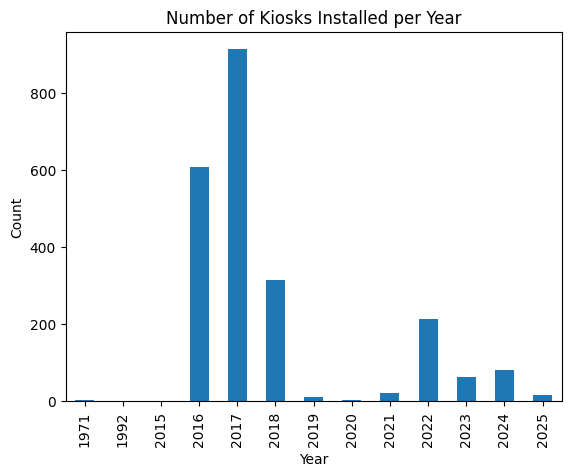

In [24]:
df['installation_complete'].dt.year.value_counts().sort_index().plot(kind='bar')
plt.title('Number of Kiosks Installed per Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()


In [25]:
# bruh 1971 entry is 100% an error - no LinkNYC kiosk existed back when disco was popping 💃
df[df['installation_complete'].dt.year == 1971]


,site_id,planned_kiosk_type,installation_status,ppt_id,legacy_id,borough,council_district,community_board,street_address,cross_street_1,...,latitude,longitude,installation_complete,activation_complete,nta,bin,bbl,census_tract,location,zone_type
435,mn-07-121406,Public Payphones,Live,121406,SC90265,Manhattan,6,107,621 WEST END AVENUE,NaN,...,40.791576,-73.976024,1971-12-01,1971-12-01,Upper West Side,1034081.0,1.012510e+09,1017900.0,"(40.791576, -73.976024)",R
1054,mn-07-121379,Public Payphones,Live,121379,SC90256,Manhattan,6,107,139 WEST END AVENUE,NaN,...,40.776177,-73.987283,1971-12-01,1971-12-01,Lincoln Square,1030923.0,1.011790e+09,1015500.0,"(40.776177, -73.987283)",R
1524,mn-07-120509,Public Payphones,Live,120509,SC90271,Manhattan,6,107,841 WEST END AVENUE,NaN,...,40.798583,-73.970917,1971-12-01,1971-12-01,Upper West Side,1057155.0,1.018898e+09,1018700.0,"(40.798583, -73.970917)",R


### Historical Context: When Were Kiosks Installed? (More info in doc)

The first LinkNYC kiosks were installed in December of **2015**, following the city’s 2014 initiative to replace payphones with public Wi-Fi hubs. Installations peaked in **2017**, marking the program’s largest expansion phase. After 2018, growth slowed as the city shifted toward upgrading existing infrastructure and introducing the newer **Link5G** models beginning in 2021 and also rollout paused during COVID-19


This timeline explains the spike around 2017 in the dataset and the smaller uptick after 2021, aligning with NYC’s ongoing 5G modernization efforts.


In [26]:
df = df[df['installation_complete'].dt.year.between(2015, 2025)]

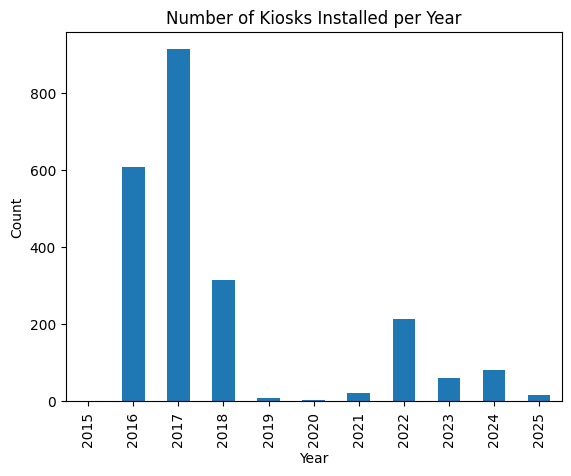

In [27]:
df['installation_complete'].dt.year.value_counts().sort_index().plot(kind='bar')
plt.title('Number of Kiosks Installed per Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

### 5G switch in 2021-2025
The city realized: Original LinkNYC kiosks were clustered in Manhattan (advertiser-friendly areas).
- Many outer boroughs lacked equitable Wi-Fi access.
- The city wanted to modernize the system while improving coverage.

So the Link5G expansion aims to:

- Bring 5G coverage to underserved areas.
- Maintain ad revenue through the same screen-based sponsorship model.
- Continue offering free Wi-Fi and calls.

### Installation Trends & LinkNYC Timeline Insights

The installation data reveals three clear phases in LinkNYC’s development - each aligning with the city’s broader technology goals.

**Phase 1: Pilot & Initial Rollout (2015–2016)**  
- LinkNYC’s first kiosks were installed in 2016 as part of the city’s plan to replace outdated payphones with free public Wi-Fi hubs.  
- Installations during this phase focused primarily on **Manhattan**, especially in high-traffic commercial areas such as Midtown and Downtown.  
- These early kiosks introduced free Wi-Fi, calling, charging, and city navigation tools, marking a major step toward digital equity and modernization.

**Phase 2: Rapid Expansion Peak (2017–2018)**  
- The data shows the highest spike in installations in **2017**, with nearly 900 new kiosks added citywide.  
- This was the **main rollout phase**, where the city scaled installations across Manhattan, Brooklyn, and Queens.  
- The focus was to maximize **advertising visibility** and **public adoption**. By the end of 2018, most central commercial corridors were equipped with LinkNYC kiosks, making the network a key piece of New York’s public tech infrastructure.


**Phase 3: Slowdown & Maintenance (2019–2021)**  
- After 2018, installations slowed significantly. The city shifted toward **maintaining existing kiosks**, addressing privacy concerns, and improving service reliability rather than expanding the network.  
- This reflects the program’s transition from growth to **stabilization**.

**Phase 4: Link5G Modernization (2022–2025)**  
- The small resurgence of new installations in **2022 and beyond** corresponds to the **Link5G expansion**, which introduced taller, more advanced kiosks equipped with **5G antennas**.  
- This upgrade aims to:
    - Extend coverage to **outer boroughs** that lacked equitable Wi-Fi access.
    - Continue generating ad revenue through the same dual-screen model.
    - Provide infrastructure for **future-ready mobile networks**.

**Overall Takeaway:**  
The installation trend mirrors the city’s evolving priorities from rapid growth and visibility (2016–2018), to stabilization and regulation (2019–2021), and finally to modernization and equity (2022–2025).  

For the City Advertising and Partnerships team, this timeline helps identify **where ad opportunities are most mature (Manhattan, Brooklyn)** and **where new visibility potential lies (Bronx, Queens, Staten Island)** as 5G kiosks roll out.


In [28]:
px.scatter_mapbox(
    df,
    lat='latitude',
    lon='longitude',
    color='zone_type',
    zoom=9,
    mapbox_style='carto-positron',
    title='Kiosks by Zoning Type (Commercial vs Residential)'
)



/var/folders/v2/9k8drrwj5h39kpr935vvx6j80000gn/T/ipykernel_4040/137839997.py:1: DeprecationWarning:

*scatter_mapbox* is deprecated! Use *scatter_map* instead. Learn more at: https://plotly.com/python/mapbox-to-maplibre/



In [29]:
px.density_mapbox(
    df,
    lat='latitude',
    lon='longitude',
    radius=10,
    zoom=9,
    mapbox_style='carto-positron',
    title='Kiosk Density Heatmap Across NYC'
)


/var/folders/v2/9k8drrwj5h39kpr935vvx6j80000gn/T/ipykernel_4040/3889706002.py:1: DeprecationWarning:

*density_mapbox* is deprecated! Use *density_map* instead. Learn more at: https://plotly.com/python/mapbox-to-maplibre/



In [30]:
# Tag replacements
df['replacement_status'] = df.apply(
    lambda x: 'Replaced Original' if (
        pd.notnull(x['installation_complete']) and 
        pd.notnull(x['activation_complete']) and 
        (x['activation_complete'].year > x['installation_complete'].year + 1)
    ) else 'Original/Unchanged',
    axis=1
)



In [31]:
def classify_generation(row):
# case 1: no activation date means it's still the original LinkNYC kiosk
    if pd.isnull(row['activation_complete']):
        return 'Original/Unchanged'
    # Activation happened during Link5G rollout (2021+)
    elif row['activation_complete'].year >= 2021:
        if row['installation_complete'].year < 2021:
            return 'Replaced Original'   # upgraded site
        else:
            return 'Link5G (New Install)'  # brand new site
    else:
        return 'Original/Unchanged'

df['replacement_status'] = df.apply(classify_generation, axis=1)


In [32]:
px.scatter_mapbox(
    df,
    lat='latitude',
    lon='longitude',
    color='replacement_status',
    zoom=9,
    mapbox_style='carto-positron',
    title='LinkNYC: Original, Replaced, and Link5G Kiosk Distribution'
)


/var/folders/v2/9k8drrwj5h39kpr935vvx6j80000gn/T/ipykernel_4040/1548540016.py:1: DeprecationWarning:

*scatter_mapbox* is deprecated! Use *scatter_map* instead. Learn more at: https://plotly.com/python/mapbox-to-maplibre/



### LinkNYC: Original vs Link5G Kiosks

This map shows how LinkNYC has changed over time.  
- 🟦 **Original kiosks** are from the first rollout (mostly 2016–2018) - these are still the older LinkNYC ones.  
- 🔴 **Link5G kiosks** are new installations added after 2021, often in the Bronx, Queens, and Staten Island.  
- 🟢 **Replaced kiosks** are older ones that got upgraded to 5G models, mostly around Manhattan and Brooklyn.

**What it shows:**
- Most upgrades happened in **Manhattan**, where foot traffic and ads bring in the most value.  
- The newer 5G kiosks are being added to **outer boroughs**, helping improve access and fill in gaps.  
- This mix shows how the city is trying to **upgrade old sites** while also **bringing faster Wi-Fi to more neighborhoods**.

**Stakeholder Impact:**  
This pattern is important for the City’s Advertising and Partnerships team - it shows where the city already has strong engagement (Manhattan) and where new opportunities are growing (Bronx, Queens, Staten Island).


# KPIS

Activation: “When does engagement begin?”
Definition: A week is considered activated when both the number of unique clients and the number of sessions are above the 75th percentile of weekly activity.
- unique_clients ≥ 323,242
- number_of_sessions ≥ 5,632,313

What it measures: High-visibility weeks where many people are connecting to the network — representing broad audience reach and ad impression potential.
Why it matters: The City’s advertising partners value volume and visibility. A large number of active users and sessions translates to more ad exposure opportunities and signals strong kiosk utilization across boroughs.


Conversion: “How many interactions become meaningful?”
Definition: Measures the share of sessions that qualify as heavy-usage sessions (data-heavy interactions). A session-week is marked as heavy usage if:
- GB_per_session ≥ 0.035 GB (75th percentile of weekly GB/session)
- Formula: conversion_rate = heavy_usage_sessions / total_sessions
What it measures: The depth of engagement-how many sessions are rich, content-heavy interactions rather than quick connections.
Why it matters: Heavy-usage sessions indicate users are spending more time on the kiosk, resulting in longer ad visibility and higher-quality interactions. For advertisers, this helps distinguish between reach (activation) and retention of attention (conversion).

Retention: “Do users come back?”
Definition: Tracks the consistency of weekly activity,  how many “activated” weeks remain active over time.
 - A week is considered retained if kiosk activity remains strong across multiple weeks (e.g., at least 2 active weeks within any 4-week period).

What it measures: The persistence of user engagement over time — how consistently kiosks maintain high activity.
Why it matters: Retention reflects sustained audience interest and reliability of engagement, showing whether kiosks continue to attract users after the initial connection surge. It also aligns with the City’s goal of sustained digital inclusion, not just one-time use.

Experience / Quality Metric: “How rich is the engagement?”
Definition: Measures the intensity and quality of interactions through:
- GB per session → Average data used per session (depth of use)
- Sessions per user → Frequency of repeat connections (loyalty/intensity)

What it measures: The “depth” of engagement — whether sessions are meaningful and repeated, reflecting consistent user value.
Why it matters: High-quality experiences mean users find value in the service, leading to stronger trust, repeat usage, and more meaningful exposure for advertisers. For LinkNYC, this bridges technical success (fast 5G connectivity) with human outcomes (continued engagement).


In [37]:
df.to_csv('/Users/ayemaq/Desktop/Mod5-Project-LinkNYC-Engagement-Analysis/data/clean/LinkNYC_location_cleaned_20251013.csv', index=False)